## Triedro de Frenet en una hélice

## Mecánica para Ingenieros. Grado en Ingeniería Civil. 


+ Alejandro E. Martínez Castro (email:amcastro@ugr.es).


_Departamento de Mecánica de Estructuras e Ingeniería Hidráulica_

_Universidad de Granada_


<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">licencia de Creative Commons Reconocimiento-NoComercial 4.0 Internacional</a>.

# Objetivos de este cuaderno

- Mostrar el cálculo simbólico de diferentes expresiones en torno a una hélice

In [1]:
from sympy import *
init_printing()

In [2]:
from sympy.physics.mechanics import ReferenceFrame

In [3]:
A = ReferenceFrame("A")
A.x

In [4]:
# Definimos nuestra propia clase para que los versores sean IJK
class IJKReferenceFrame(ReferenceFrame):
    def __init__(self, name=""):
        super(IJKReferenceFrame,self).__init__(name, latexs=['\overrightarrow{%s}_{%s}' % (idx, name) for idx in ("i", "j", "k")])
        self.i = self.x
        self.j = self.y
        self.k = self.z

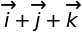

In [5]:
A = IJKReferenceFrame()
A.i + A.j + A.k

In [6]:
theta = symbols('theta', real = True)
theta

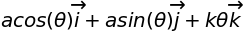

In [7]:
a, k = symbols('a, k', positive = True, real = True) 
r = a * cos(theta) * A.x + a * sin(theta) * A.y + k * theta * A.z
r

In [8]:
from sympy.physics.mechanics import dot, cross # Para realizar producto escalar y vectorial

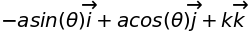

In [9]:
rp=r.diff(theta,A)
rp

In [10]:
rpp  = rp.diff(theta,A)
rppp = rpp.diff(theta,A)

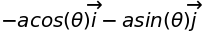

In [11]:
rpp

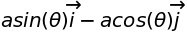

In [12]:
rppp

## Vector tangente

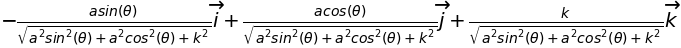

In [13]:
tau = symbols('tau', real = True)
tau = rp.normalize()
tau

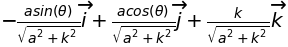

In [14]:
tau.simplify()

## Vector binormal

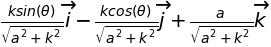

In [15]:
beta = (rp ^ rpp).normalize()
beta.simplify()

## Vector normal

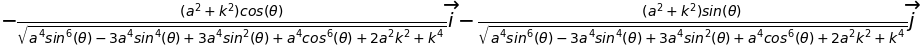

In [16]:
nu = beta ^ tau
nu.simplify()


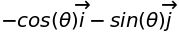

In [17]:
nu2 = rp ^ rpp
nu2 = nu2 ^ rp
nu2 = nu2.normalize()
nu2.simplify()

In [ ]:
tau = tau.simplify()
nu = nu.simplify
nu3 = beta ^tau
nu3.simplify()

# Cálculo de la curvatura

In [18]:
curv = (rp ^ rpp).magnitude() / rp.magnitude() **3
curv.simplify()

Como sospechábamos, la hélice es una curva de curvatura constante en todos sus puntos. Además, si k vale cero, la epresión anterior tiende $\dfrac{1}{a}$, que coincide con la curvatura de una circunferencia.

## Cálculo de la torsión

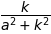

In [19]:
tors = (rp.dot(rpp ^ rppp)) / (rp ^ rpp).magnitude()**2
tors.simplify()

También sospechábamos que la torsión era constante en todo punto. Claramente, la expresión de la torsión tiende a cero, cuando $k$ tiende a cero

## Verificación

Se va a comprobar el vector $\vec{\tau}$